In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [31]:

Age = np.random.randint(18,45,100)

working_hours = np.random.randint(5,9,100)

experience = np.random.randint(0,10,100)



In [37]:
df = pd.DataFrame()

In [38]:
df['working_hours'] = working_hours

In [40]:
df['Age'] = Age

In [41]:
df['experience'] = experience

In [42]:
df.to_csv('linear_regression.csv')

In [49]:
data = pd.read_csv('linear_regression.csv')

In [48]:
data

,Unnamed: 0,working_hours,Age,experience,Salary,Student
0,0,7,39,9,100000,False
1,1,5,28,1,20000,True
2,2,8,25,3,35000,True
3,3,8,44,5,10000,False
4,4,6,43,8,120000,False
5,5,8,34,5,50000,False
6,6,5,30,1,15000,True
7,7,6,24,3,20000,True
8,8,5,42,9,120000,False
9,9,5,36,6,30000,False


In [50]:
data.shape

(100, 6)

# Correlation Heatmap

In [51]:
def corr_heatmap(data_frame,size=11):
    correlation = data_frame.corr()
    
    fig,heatmap = plt.subplots(figsize=(size,size))
    
    heatmap.matshow(correlation)
    
    plt.xticks(range(len(correlation.columns)),correlation.columns)
    plt.yticks(range(len(correlation.columns)),correlation.columns)
    
    plt.show()

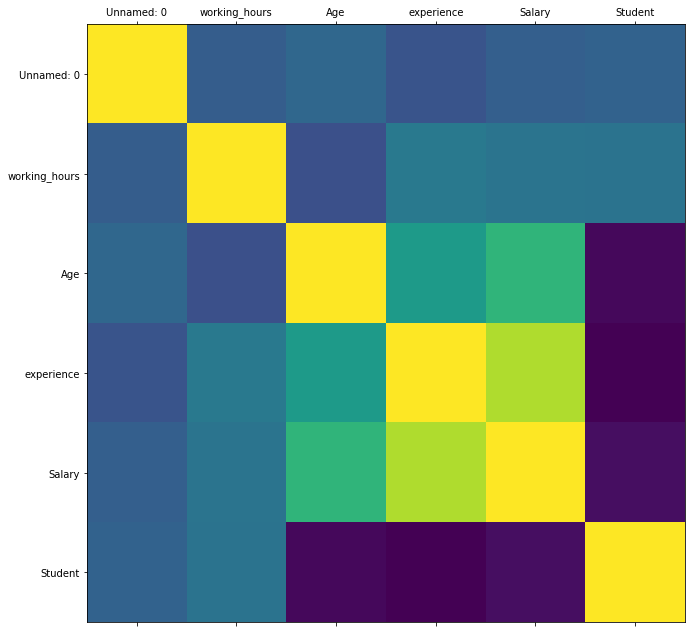

In [52]:
corr_heatmap(data)

# Data Molding

In [58]:
#Mapping true values to 1 and false values 0
map_student = {True : 1 ,False : 0}


#setting the map to data frame
data['Student'] = data['Student'].map(map_student)

data.head()

,Unnamed: 0,working_hours,Age,experience,Salary,Student
0,0,7,39,9,100000,0
1,1,5,28,1,20000,1
2,2,8,25,3,35000,1
3,3,8,44,5,10000,0
4,4,6,43,8,120000,0


# True / False Ratio চেক করা

In [60]:
num_true = 0.0
num_false = 0.0

for item in data['Student']:
    if item == True:
        num_true += 1
    else:
        num_false += 1

percent_true = (num_true / (num_true + num_false)) * 100
percent_false = (num_false / (num_true + num_false)) * 100

print("Number of True Cases: {0} ({1:2.2f}%)".format(num_true, percent_true))
print("Number of False Cases: {0} ({1:2.2f}%)".format(num_false, percent_false))

Number of True Cases: 36.0 (36.00%)
Number of False Cases: 64.0 (64.00%)


# Model Training


Dataset Splitting

In [61]:
from sklearn.cross_validation import train_test_split

feature_column_names = ['working_hours','Age','experience','Salary']

predicted_class_name = ['Student']

# Getting feature variable values

X = data[feature_column_names].values
y = data[predicted_class_name].values

# Saving 30% for testing
split_test_size = .30

# Splitting using scikit-learn train_test_split function

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42)

In [62]:
print("{0:0.2f}% in training set".format((len(X_train)/len(data.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(data.index)) * 100))

70.00% in training set
30.00% in test set


# Model Testing

In [64]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None)

In [ ]:
# This returns array of predicted results
prediction_from_trained_data = nb_model.predict(X_train)

Prediction from trained data

In [66]:
# performance metrics library
from sklearn import metrics

# get current accuracy of the model

accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)

print("Accuracy of our naive bayes model is : {0:.4f}".format(accuracy))

Accuracy of our naive bayes model is : 0.7857


Prediction from test data

In [67]:
# this returns array of predicted results from test_data
prediction_from_test_data = nb_model.predict(X_test)

accuracy = metrics.accuracy_score(y_test, prediction_from_test_data)

print ("Accuracy of our naive bayes model is: {0:0.4f}".format(accuracy))

Accuracy of our naive bayes model is: 0.8333


# কনফিউশন ম্যাট্রিক্স

In [70]:
print ("Confusion Matrix")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, prediction_from_test_data, labels=[1, 0])))

Confusion Matrix
[[ 5  0]
 [ 5 20]]


In [71]:
print ("Classification Report")

# labels for set 1=True to upper left and 0 = False to lower right
print("{0}".format(metrics.classification_report(y_test, prediction_from_test_data, labels=[1, 0]))) 

Classification Report
             precision    recall  f1-score   support

          1       0.50      1.00      0.67         5
          0       1.00      0.80      0.89        25

avg / total       0.92      0.83      0.85        30



# Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier object
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

Random Forest Performance Testing : Predict Training Data

In [73]:
rf_predict_train = rf_model.predict(X_train)

#get accuracy
rf_accuracy = metrics.accuracy_score(y_train, rf_predict_train)

#print accuracy
print ("Accuracy: {0:.4f}".format(rf_accuracy))

Accuracy: 0.9571


Random Forest Performance Testing : Predict Testing Data

In [74]:
rf_predict_test = rf_model.predict(X_test)

#get accuracy
rf_accuracy_testdata = metrics.accuracy_score(y_test, rf_predict_test)

#print accuracy
print ("Accuracy: {0:.4f}".format(rf_accuracy_testdata))

Accuracy: 0.9000


Confusion Matrix for Random Forest

In [75]:
print ("Confusion Matrix for Random Forest")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test, labels=[1, 0])))

print()

print ("Classification Report\n")

# labels for set 1=True to upper left and 0 = False to lower right
print ( "{0}".format(metrics.classification_report(y_test, rf_predict_test, labels=[1, 0])))

Confusion Matrix for Random Forest
[[ 3  2]
 [ 1 24]]

Classification Report

             precision    recall  f1-score   support

          1       0.75      0.60      0.67         5
          0       0.92      0.96      0.94        25

avg / total       0.89      0.90      0.90        30

